In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import koreanize_matplotlib

###  /home/yj/dev_ws/project_UFO/data -> 자신의 환경에 맞게 수정

In [ ]:
import kagglehub
import os
import zipfile
import shutil

# 1️⃣ 저장할 경로
save_path = '/home/yj/dev_ws/project_UFO/data'    #  /home/yj/dev_ws/project_UFO/data -> 자신의 환경에 맞게 수정
os.makedirs(save_path, exist_ok=True)

# 2️⃣ dataset 다운로드 (최신 버전)
downloaded = kagglehub.dataset_download("NUFORC/ufo-sightings", force_download=True)

# 3️⃣ 다운로드 결과 확인
if os.path.isdir(downloaded):
    # 이미 폴더라면, 안에 있는 파일을 save_path로 복사
    for file in os.listdir(downloaded):
        shutil.copy(os.path.join(downloaded, file), save_path)
    print(f"Dataset folder copied to: {save_path}")
else:
    # zip 파일이면 이동 후 압축 해제
    shutil.move(downloaded, os.path.join(save_path, 'ufo-sightings.zip'))
    with zipfile.ZipFile(os.path.join(save_path, 'ufo-sightings.zip'), 'r') as zip_ref:
        zip_ref.extractall(save_path)
    print(f"Dataset downloaded and extracted to: {save_path}")


100%|██████████| 10.2M/10.2M [00:00<00:00, 17.9MB/s]

Extracting files...


Dataset folder copied to: /home/yj/dev_ws/project_UFO/data


In [39]:
raw_data = pd.read_csv('/home/yj/dev_ws/project_UFO/data/scrubbed.csv')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              80332 non-null  object 
 1   city                  80332 non-null  object 
 2   state                 74535 non-null  object 
 3   country               70662 non-null  object 
 4   shape                 78400 non-null  object 
 5   duration (seconds)    80332 non-null  object 
 6   duration (hours/min)  80332 non-null  object 
 7   comments              80317 non-null  object 
 8   date posted           80332 non-null  object 
 9   latitude              80332 non-null  object 
 10  longitude             80332 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


/tmp/ipykernel_22402/3585133660.py:1: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv('/home/yj/dev_ws/project_UFO/data/scrubbed.csv')


In [5]:
UFO = pd.read_csv('/home/yj/dev_ws/project_UFO/data/scrubbed.csv', header=0, low_memory=False)
UFO.head(30)

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611
5,10/10/1961 19:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.5950000,-82.188889
6,10/10/1965 21:00,penarth (uk/wales),NaN,gb,circle,180,about 3 mins,penarth uk circle 3mins stayed 30ft above m...,2/14/2006,51.434722,-3.180000
7,10/10/1965 23:45,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.1175000,-73.408333
8,10/10/1966 20:00,pell city,al,us,disk,180,3 minutes,Strobe Lighted disk shape object observed clos...,3/19/2009,33.5861111,-86.286111
9,10/10/1966 21:00,live oak,fl,us,disk,120,several minutes,Saucer zaps energy from powerline as my pregna...,5/11/2005,30.2947222,-82.984167


/tmp/ipykernel_22402/2379672095.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=decade_counts.index.astype(str), y=decade_counts.values,


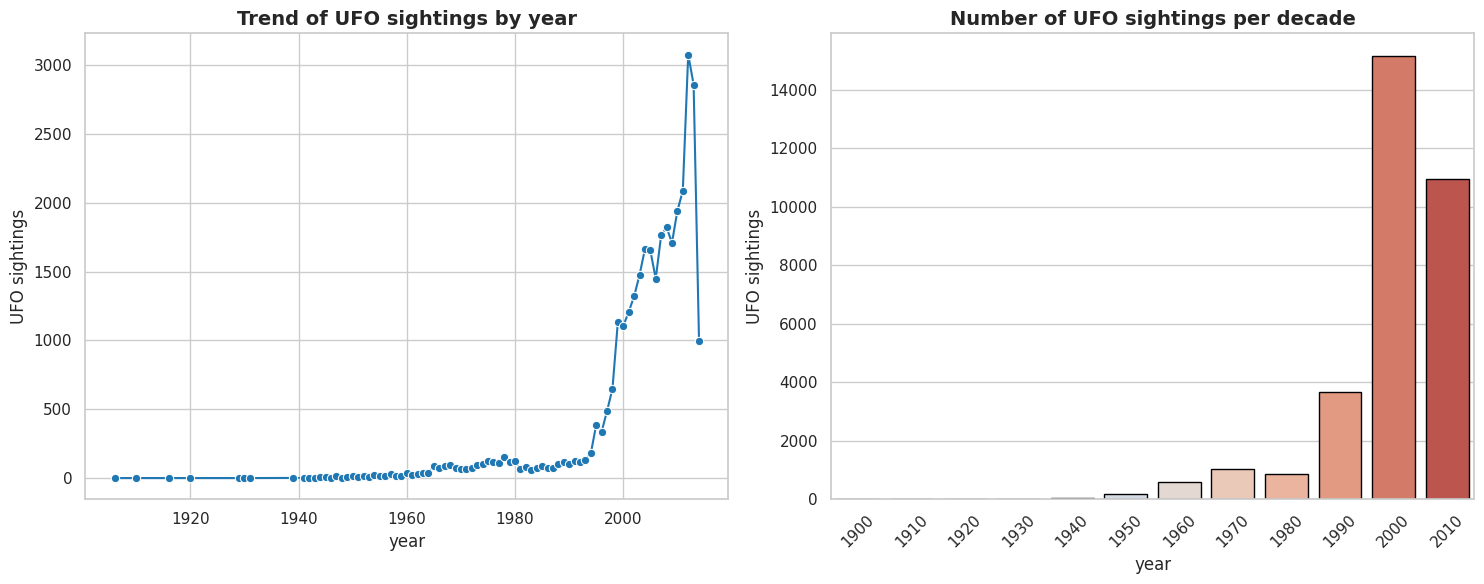

In [11]:

# datetime 컬럼을 날짜형으로 변환
UFO['datetime'] = pd.to_datetime(UFO['datetime'], errors='coerce', dayfirst=True)
UFO['year'] = UFO['datetime'].dt.year

# 유효한 연도만 필터링 (1900~2025)
UFO = UFO[(UFO['year'] >= 1900) & (UFO['year'] <= 2025)]

# 연도별 / 10년 단위 집계
yearly_counts = UFO['year'].value_counts().sort_index()
UFO['decade'] = (UFO['year'] // 10) * 10
decade_counts = UFO['decade'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(15, 6))

# ────────────── (1) 연도별 그래프 ──────────────
plt.subplot(1, 2, 1)
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values,
             marker='o', color='#1f77b4')
plt.title('Trend of UFO sightings by year', fontsize=14, fontweight='bold')
plt.xlabel('year')
plt.ylabel('UFO sightings')

# ────────────── (2) 10년 단위 그래프 ──────────────
plt.subplot(1, 2, 2)
sns.barplot(x=decade_counts.index.astype(str), y=decade_counts.values,
            palette='coolwarm', edgecolor='black')
plt.title('Number of UFO sightings per decade', fontsize=14, fontweight='bold')
plt.xlabel('year')
plt.ylabel('UFO sightings')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### 1990~ 이후로 급격하게 목격사례가 증가하고 있습니다. -> 밀레니엄 시대를 지나면 UFO와 같은 초자연적 사례에 대한 관심이 높아지는 사회적 현상?

In [19]:
# 1️⃣ country 컬럼: 종류와 몇 종인지
country_counts = UFO['country'].value_counts(dropna=False)
print("Country 종류 개수:", UFO['country'].nunique(dropna=True))
print("Country 종류별 개수:\n", country_counts)

print("\n" + "="*50 + "\n")

# 2️⃣ shape 컬럼: 종류와 몇 종인지
shape_counts = UFO['shape'].value_counts(dropna=False)
print("Shape 종류 개수:", UFO['shape'].nunique(dropna=True))
print("Shape 종류별 개수:\n", shape_counts)

print("\n" + "="*50 + "\n")

# 3️⃣ duration (seconds) 컬럼: country별 평균
# 먼저 숫자로 변환 (변환 실패는 NaN 처리)
UFO['duration (seconds)'] = pd.to_numeric(UFO['duration (seconds)'], errors='coerce')

duration_mean_by_country = UFO.groupby('country')['duration (seconds)'].mean().sort_values(ascending=False)
print("Country별 평균 duration (seconds):\n", duration_mean_by_country)

Country 종류 개수: 5
Country 종류별 개수:
 country
us     65114
NaN     9670
ca      3000
gb      1905
au       538
de       105
Name: count, dtype: int64


Shape 종류 개수: 29
Shape 종류별 개수:
 shape
light        16565
triangle      7865
circle        7608
fireball      6208
other         5649
unknown       5584
sphere        5387
disk          5213
oval          3733
formation     2457
cigar         2057
changing      1962
NaN           1932
flash         1328
rectangle     1297
cylinder      1283
diamond       1178
chevron        952
egg            759
teardrop       750
cone           316
cross          233
delta            7
round            2
crescent         2
pyramid          1
flare            1
hexagon          1
dome             1
changed          1
Name: count, dtype: int64


Country별 평균 duration (seconds):
 country
gb    66061.321207
ca    28859.437007
de    24255.980952
us     5800.192049
au     3806.469238
Name: duration (seconds), dtype: float64


/tmp/ipykernel_22402/193436097.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette='coolwarm', edgecolor='black')


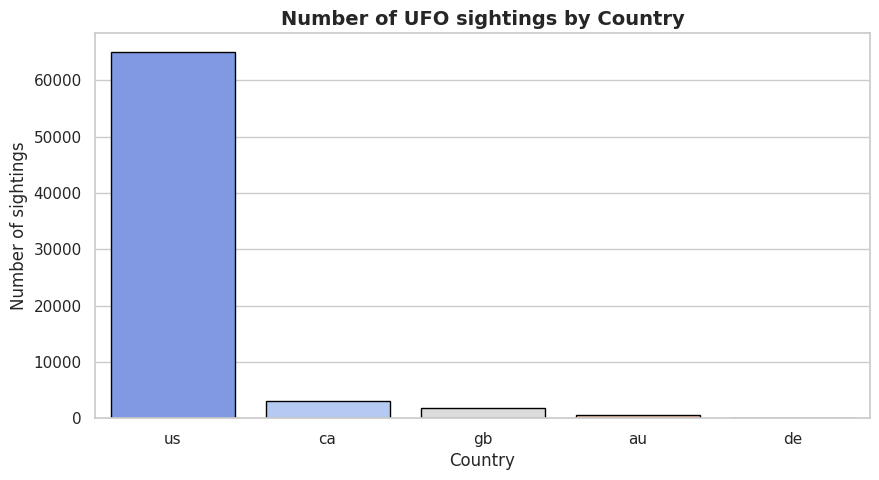

/tmp/ipykernel_22402/193436097.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=shape_counts.index, y=shape_counts.values, palette='coolwarm', edgecolor='black')


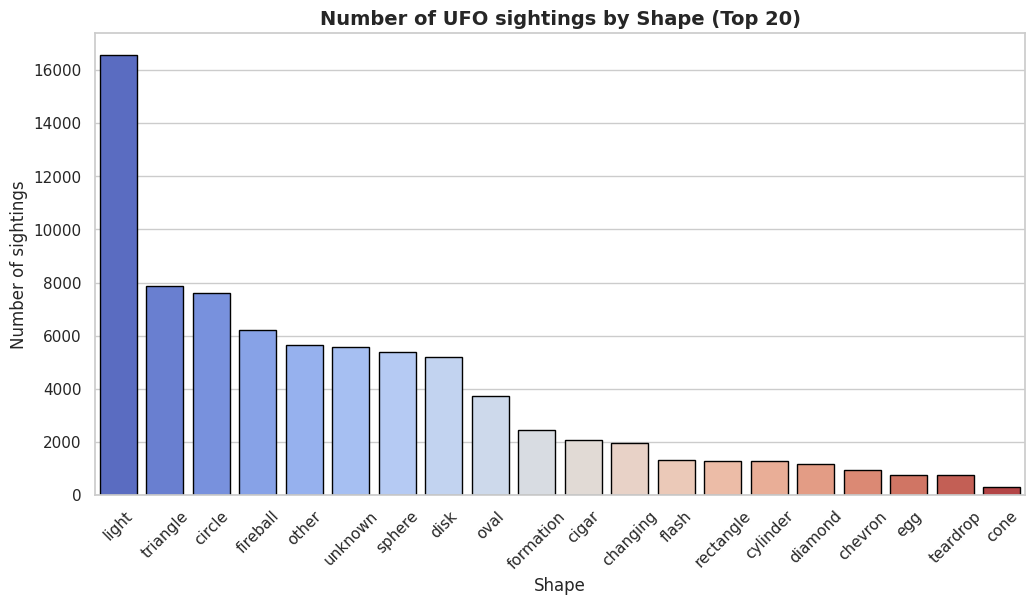

/tmp/ipykernel_22402/193436097.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=duration_mean_by_country.index, y=duration_mean_by_country.values,


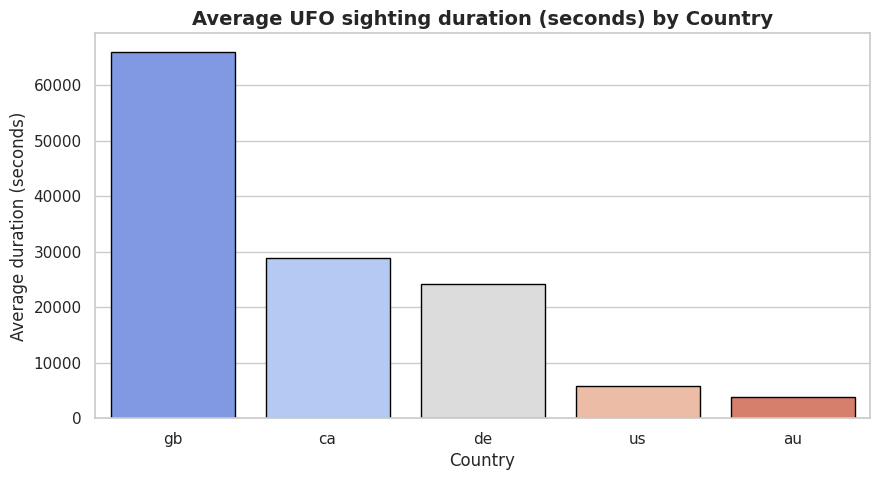

In [20]:
sns.set(style='whitegrid', palette='coolwarm')

# 1️⃣ CSV 불러오기
UFO = pd.read_csv('/home/yj/dev_ws/project_UFO/data/scrubbed.csv', low_memory=False)

# 2️⃣ duration (seconds) 숫자로 변환
UFO['duration (seconds)'] = pd.to_numeric(UFO['duration (seconds)'], errors='coerce')

# ────────────── (1) Country 종류별 개수 ──────────────
country_counts = UFO['country'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=country_counts.index, y=country_counts.values, palette='coolwarm', edgecolor='black')
plt.title('Number of UFO sightings by Country', fontsize=14, fontweight='bold')
plt.xlabel('Country')
plt.ylabel('Number of sightings')
plt.show()

# ────────────── (2) Shape 종류별 개수 ──────────────
shape_counts = UFO['shape'].value_counts().head(20)  # 상위 20개만 표시
plt.figure(figsize=(12,6))
sns.barplot(x=shape_counts.index, y=shape_counts.values, palette='coolwarm', edgecolor='black')
plt.title('Number of UFO sightings by Shape (Top 20)', fontsize=14, fontweight='bold')
plt.xlabel('Shape')
plt.ylabel('Number of sightings')
plt.xticks(rotation=45)
plt.show()

# ────────────── (3) Duration(seconds) Country별 평균 ──────────────
duration_mean_by_country = UFO.groupby('country')['duration (seconds)'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=duration_mean_by_country.index, y=duration_mean_by_country.values,
            palette='coolwarm', edgecolor='black')
plt.title('Average UFO sighting duration (seconds) by Country', fontsize=14, fontweight='bold')
plt.xlabel('Country')
plt.ylabel('Average duration (seconds)')
plt.show()

### 
1. 국가별 UFO 목격 사례
미국이 압도적으로 높음 -> 미국 문화권에서 UFO에 대한 관심이 높다?

2. UFO의 형태별 사례 분류
빛 형태가 가장 많고 2순위부터는 차이가 그렇게 크지는 않지만 삼각형 형태가 2위 인것은 꽤 특이하다

3. 국가별 UFO 목격 지속시간 평균
561행에 duration 값(97836000 (31년))이 너무 큰 데이터때문에 gb값이 튄 듯 합니다.

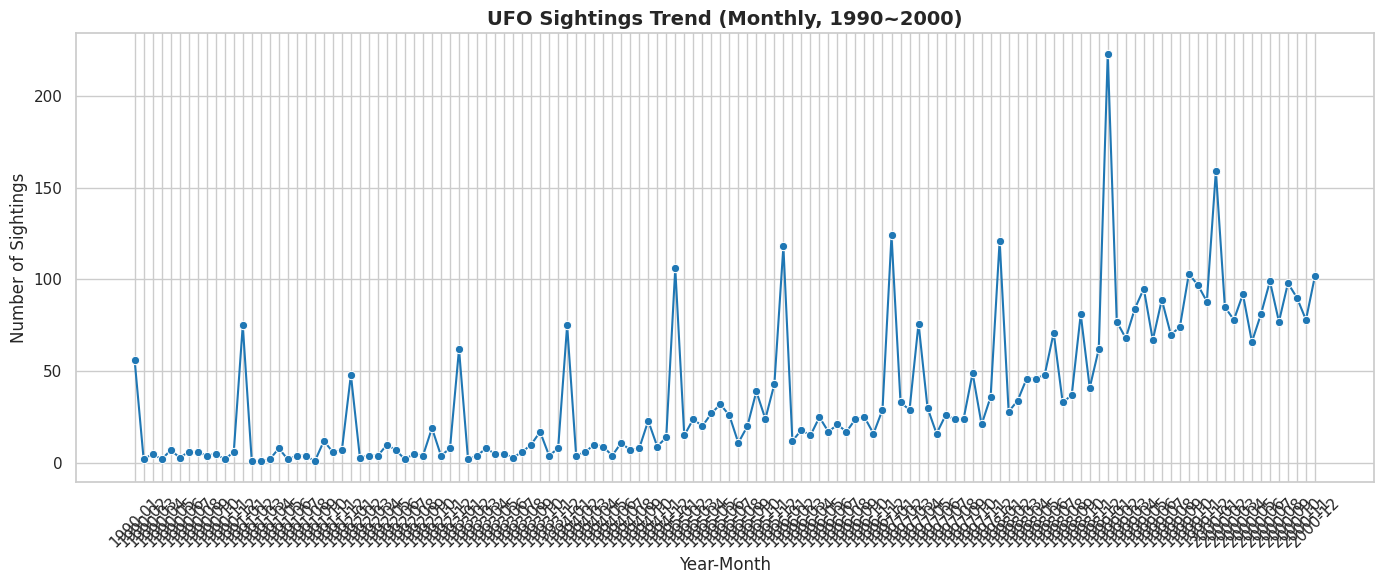

In [21]:
# Seaborn 스타일
sns.set(style='whitegrid', palette='coolwarm')

# 1️⃣ CSV 불러오기
UFO = pd.read_csv('/home/yj/dev_ws/project_UFO/data/scrubbed.csv', low_memory=False)

# 2️⃣ datetime 컬럼을 날짜형으로 변환
UFO['datetime'] = pd.to_datetime(UFO['datetime'], errors='coerce', dayfirst=True)

# 3️⃣ 1990~2000 사이 데이터만 필터링
UFO = UFO[(UFO['datetime'].dt.year >= 1990) & (UFO['datetime'].dt.year <= 2000)]

# 4️⃣ 연-월 단위 컬럼 생성
UFO['year_month'] = UFO['datetime'].dt.to_period('M')

# 5️⃣ 월별 UFO 목격 건수 집계
monthly_counts = UFO['year_month'].value_counts().sort_index()

# 6️⃣ 시각화
plt.figure(figsize=(14,6))
sns.lineplot(x=monthly_counts.index.astype(str), y=monthly_counts.values, marker='o', color='#1f77b4')
plt.title('UFO Sightings Trend (Monthly, 1990~2000)', fontsize=14, fontweight='bold')
plt.xlabel('Year-Month')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 뭔가 특이한 점이 있긴 한데 아래쪽이 너무 촘촘해서 보이질 않음.

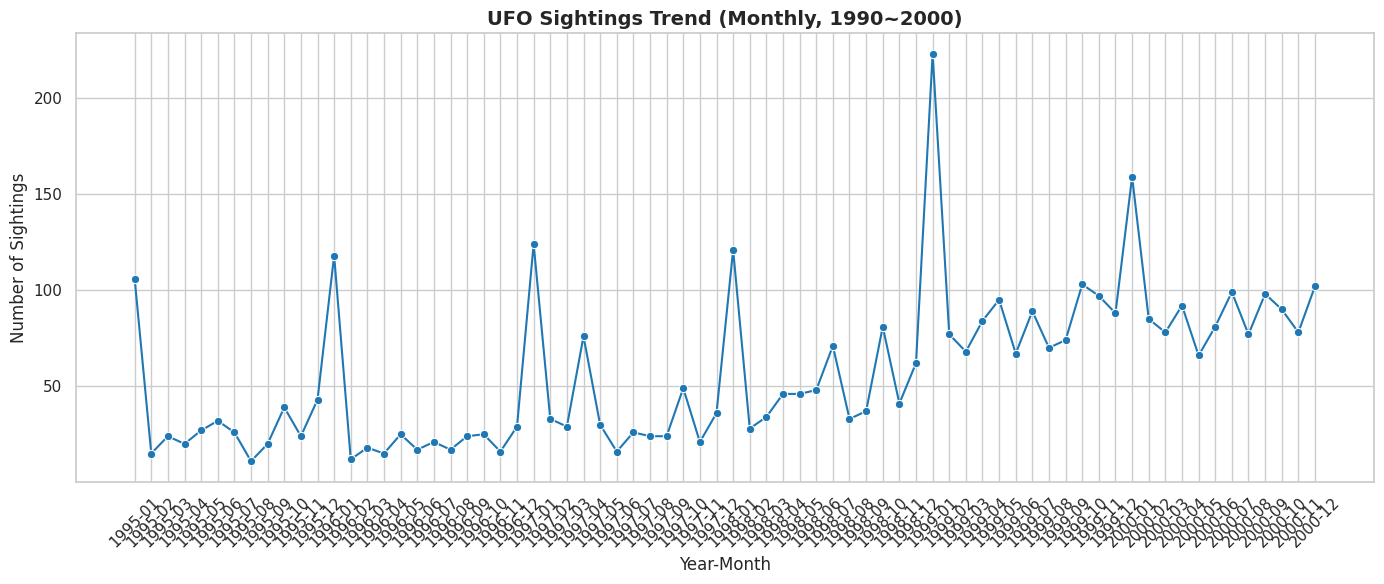

In [27]:
# Seaborn 스타일
sns.set(style='whitegrid', palette='coolwarm')

# 1️⃣ CSV 불러오기
UFO = pd.read_csv('/home/yj/dev_ws/project_UFO/data/scrubbed.csv', low_memory=False)

# 2️⃣ datetime 컬럼을 날짜형으로 변환
UFO['datetime'] = pd.to_datetime(UFO['datetime'], errors='coerce', dayfirst=True)

# 3️⃣ 1990~2000 사이 데이터만 필터링
UFO = UFO[(UFO['datetime'].dt.year >= 1995) & (UFO['datetime'].dt.year <= 2000)]

# 4️⃣ 연-월 단위 컬럼 생성
UFO['year_month'] = UFO['datetime'].dt.to_period('M')

# 5️⃣ 월별 UFO 목격 건수 집계
monthly_counts = UFO['year_month'].value_counts().sort_index()

# 6️⃣ 시각화
plt.figure(figsize=(14,6))
sns.lineplot(x=monthly_counts.index.astype(str), y=monthly_counts.values, marker='o', color='#1f77b4')
plt.title('UFO Sightings Trend (Monthly, 1990~2000)', fontsize=14, fontweight='bold')
plt.xlabel('Year-Month')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 이상하게 12월 달에만 UFO목격담이 많다.

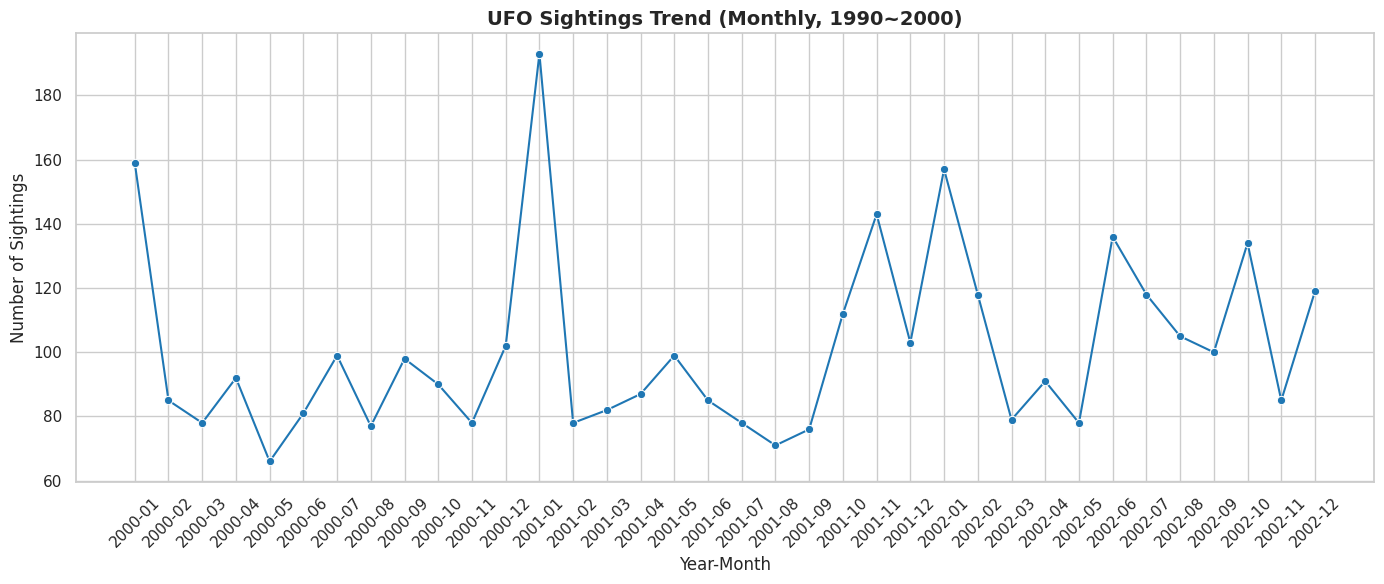

In [40]:
# Seaborn 스타일
sns.set(style='whitegrid', palette='coolwarm')

# 1️⃣ CSV 불러오기
UFO = pd.read_csv('/home/yj/dev_ws/project_UFO/data/scrubbed.csv', low_memory=False)

# 2️⃣ datetime 컬럼을 날짜형으로 변환
UFO['datetime'] = pd.to_datetime(UFO['datetime'], errors='coerce', dayfirst=True)

# 3️⃣ 1990~2000 사이 데이터만 필터링
UFO = UFO[(UFO['datetime'].dt.year >= 2000) & (UFO['datetime'].dt.year <= 2002)]

# 4️⃣ 연-월 단위 컬럼 생성
UFO['year_month'] = UFO['datetime'].dt.to_period('M')

# 5️⃣ 월별 UFO 목격 건수 집계
monthly_counts = UFO['year_month'].value_counts().sort_index()

# 6️⃣ 시각화
plt.figure(figsize=(14,6))
sns.lineplot(x=monthly_counts.index.astype(str), y=monthly_counts.values, marker='o', color='#1f77b4')
plt.title('UFO Sightings Trend (Monthly, 1990~2000)', fontsize=14, fontweight='bold')
plt.xlabel('Year-Month')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 911테러 당시 뉴스영상에 UFO가 찍혔다는 소문으로 인해 UFO목격 신고가 일시적으로 증가했다는 얘기가 있는데 실제로 조금 증가한것은 확인된다.

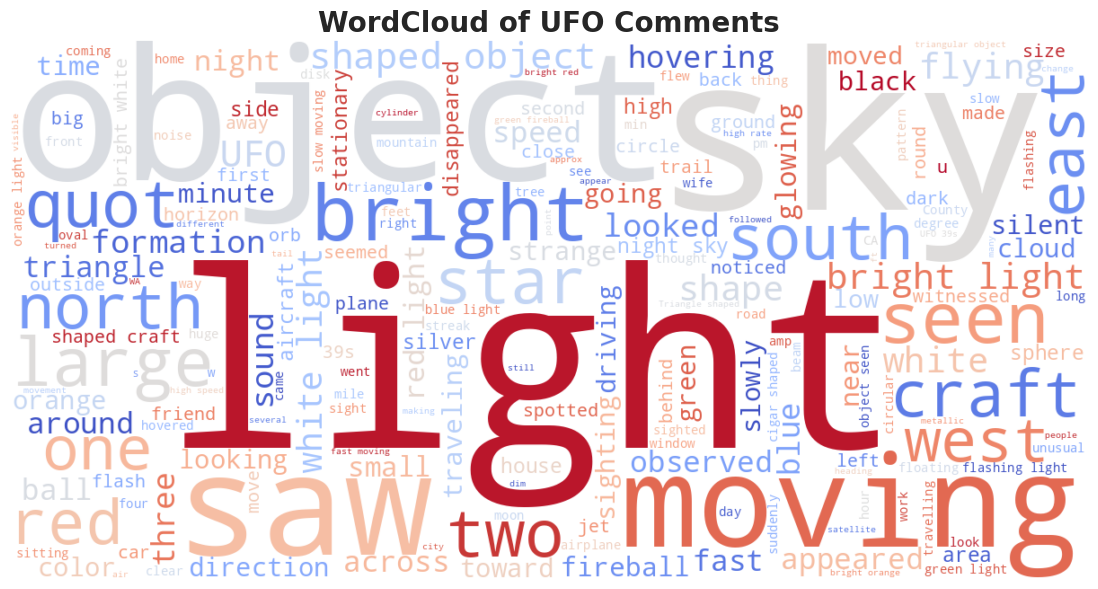

In [29]:
from wordcloud import WordCloud, STOPWORDS

# 2️⃣ comments 컬럼 합치기
text = " ".join(comment for comment in UFO['comments'].dropna())

# 3️⃣ 불용어(Stopwords) 설정
stopwords = set(STOPWORDS)
# 필요하면 'the', 'a', 'and' 같은 일반 단어 추가
stopwords.update(['the', 'a', 'and', 'of', 'to', 'in', 'on', 'with', 'is'])

# 4️⃣ WordCloud 생성
wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color='white',
    stopwords=stopwords,
    collocations=True,  # 동일 단어 묶기 허용
    colormap='coolwarm'
).generate(text)

# 5️⃣ 시각화
plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of UFO Comments', fontsize=20, fontweight='bold')
plt.show()


### comments에 언급된 키워드 갯수 wordcloud

In [46]:
import plotly.express as px

# 1. 데이터 불러오기
# 파일 경로가 로컬 환경에 맞게 지정되었는지 확인하세요.
file_path = '/home/yj/dev_ws/project_UFO/data/scrubbed.csv'
df = pd.read_csv(file_path, low_memory=False)

# 2. 'country' 컬럼 전처리 (대문자로 통일)
df['country'] = df['country'].str.upper()

# 3. 국가별 목격 사례 시각화 (세계 지도)
print("--- 🗺️ 국가별 목격 사례 시각화 ---")

# 국가별 목격 횟수 계산
country_counts = df['country'].value_counts().reset_index()
country_counts.columns = ['country_iso2', 'count']

# ISO 2 코드를 Plotly가 지원하는 ISO 3 코드로 변환하는 매핑 테이블 정의
iso2_to_iso3 = {
    'US': 'USA',  # United States
    'CA': 'CAN',  # Canada
    'GB': 'GBR',  # United Kingdom
    'AU': 'AUS',  # Australia
    'DE': 'DEU',  # Germany
    # 데이터셋에 포함된 기타 국가 코드가 있다면 여기에 추가합니다.
}

# ISO-3 코드 컬럼 추가 및 결측치 제거
country_counts['country_iso3'] = country_counts['country_iso2'].map(iso2_to_iso3)
country_counts_mapped = country_counts.dropna(subset=['country_iso3'])


# Plotly Choropleth 지도 생성
fig_map = px.choropleth(
    country_counts_mapped, # 매핑된 데이터를 사용
    locations='country_iso3',  # ISO 3 코드 컬럼 지정
    color='count',        
    hover_name='country_iso2', # 마우스를 올렸을 때 ISO 2 코드를 표시
    color_continuous_scale=px.colors.sequential.Plasma, 
    title='UFO numbers by Country',
    locationmode='ISO-3' # **ISO-3로 변경하여 ValueError 해결**
)

# 지도를 웹 브라우저로 출력
fig_map.show()


--- 🗺️ 국가별 목격 사례 시각화 ---


--- 🛸 국가별 Top 5 목격 형태 ---

[US]
   shape  count
   light  13473
triangle   6549
 unknown   6120
  circle   6118
fireball   5148

[CA]
   shape  count
   light    655
  circle    284
triangle    268
 unknown    252
   other    241

[GB]
   shape  count
   light    361
  circle    243
triangle    169
  sphere    158
 unknown    142

[AU]
   shape  count
   light    119
  circle     62
    disk     50
triangle     43
   other     40

[DE]
   shape  count
   light     20
  circle     10
 unknown     10
triangle      9
   other      9


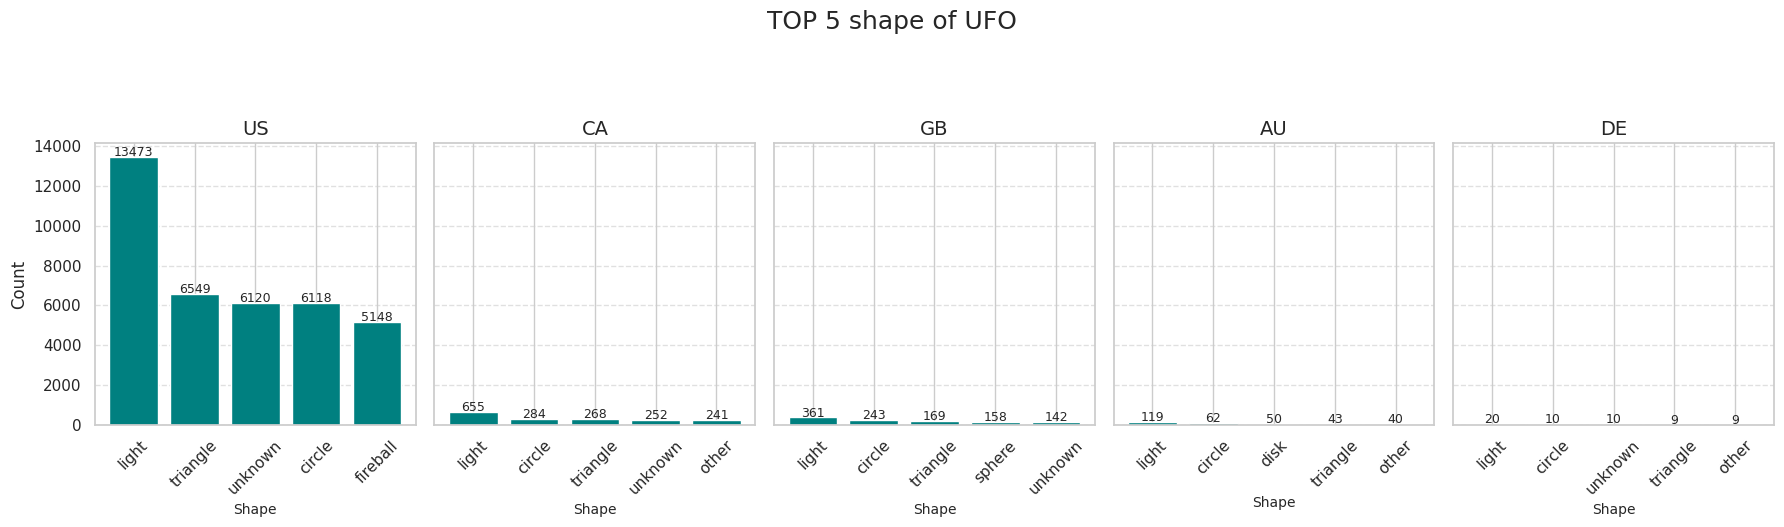

In [47]:
# 1. 데이터 불러오기 (이전 코드에서 로드된 df 사용을 가정)
file_path = '/home/yj/dev_ws/project_UFO/data/scrubbed.csv'
df = pd.read_csv(file_path, low_memory=False)

# 2. 'country' 및 'shape' 컬럼 전처리
df['country'] = df['country'].str.upper()
df['shape'] = df['shape'].fillna('unknown').str.lower()

# 3. 주요 5개 국가만 필터링
main_countries = ['US', 'CA', 'GB', 'AU', 'DE']
df_filtered = df[df['country'].isin(main_countries)]

# 4. 국가별, 형태별 집계 및 Top 5 형태 추출
# 국가 및 형태별 목격 횟수를 집계
country_shape_counts = df_filtered.groupby(['country', 'shape']).size().reset_index(name='count')

# 각 국가별 Top 5 형태를 저장할 딕셔너리 초기화
top5_shapes_per_country = {}

for country in main_countries:
    # 해당 국가의 데이터만 필터링
    country_data = country_shape_counts[country_shape_counts['country'] == country]
    
    # 'count' 기준으로 내림차순 정렬 후 상위 5개 추출
    top5 = country_data.sort_values(by='count', ascending=False).head(5)
    top5_shapes_per_country[country] = top5

print("--- 🛸 국가별 Top 5 목격 형태 ---")
for country, data in top5_shapes_per_country.items():
    print(f"\n[{country}]")
    print(data[['shape', 'count']].to_string(index=False))


# 5. 서브플롯(Subplots)을 이용한 시각화
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(18, 5), sharey=True)
fig.suptitle('TOP 5 shape of UFO', fontsize=18, y=1.05)

# 서브플롯에 데이터 플로팅
for i, country in enumerate(main_countries):
    # i: 0부터 4, country: 'US', 'CA', 'GB', 'AU', 'DE'
    ax = axes[i]
    data = top5_shapes_per_country[country]
    
    # 막대 그래프 생성
    ax.bar(data['shape'], data['count'], color='teal')
    
    # 각 막대 위에 횟수 표시
    for j, count in enumerate(data['count']):
        ax.text(j, count + 50, str(count), ha='center', fontsize=9)
        
    ax.set_title(country, fontsize=14)
    ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel('Shape', fontsize=10)
    ax.grid(axis='y', linestyle='--', alpha=0.6)

# y축 레이블은 첫 번째 서브플롯에만 표시
axes[0].set_ylabel('Count', fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.95]) # supertitle 공간 확보
plt.show()